# Analyzing Marketing Campaigns with pandas ②
> [Analyzing Marketing Campaigns with pandas - ②Exploratory Analysis & Summary Statistics](https://learn.datacamp.com/courses/analyzing-marketing-campaigns-with-pandas) まとめ, via Datacamp

- toc: true
- badges: false
- comments: true
- author: Jay Sung
- categories: [Datacamp]

- - -

In [26]:
#
# import data

import pandas as pd

marketing = pd.read_csv('./dataset/marketing.csv')

In [6]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


- - -
## キャンペーンは成功したのか？
これを評価するために、いくつかの指標が使われる。

- 転換率（Conversion rate）
- 保持率（Retention rate）

etc.


### 転換率（Conversion rate）を求める

$Conversion\space rate = \cfrac{Number\space of\space people\space who\space convert}{Total\space number\space of\space people\space we\space marketed\space to} $


In [7]:
#
# すべての顧客を求める。(Total number of people we marketed to)
total = marketing['user_id'].nunique()

# 転換した顧客を求める。(Number of people who converted)
subscribers = marketing[marketing["converted"] == True]['user_id'].nunique()

# 転換率を計算する。
conversion_rate = subscribers/total
print(round(conversion_rate*100, 2), "%")

13.89 %


### 保持率（Retention rate）を求める

$Retention\space rate = \cfrac{Number\space of\space people\space who\space remain\space subscribed}{Total\space number\space of\space people\space who\space converted} $



In [9]:
#
# 転換した顧客を求める。 (Total number of people who converted)
total_subscribers = marketing[marketing["converted"] == True]\
                            ['user_id'].nunique()

# 保持した顧客を求める。(Number of people who remained subscribed)
retained = marketing[marketing['is_retained'] == True]\
                   ['user_id'].nunique()

# 保持率を計算する。
retention_rate = retained/total_subscribers
print(round(retention_rate*100, 2), "%")

66.8 %


- - -
## セグメンテーション

顧客をセグメント化するには、いくつかの一般的な基準がある。

- 年齢
- 性別
- 場所
- 過去の取引
- 取引したマーケッティングチャネル

etc.

In [11]:
#
# 英語使用者を抽出
english_speakers = marketing[marketing['language_displayed'] == 'English']

# 英語使用者のユニークIDを数える
total = english_speakers['user_id'].nunique()

# 転換した英語使用者
subscribers = english_speakers[english_speakers['converted'] == True]\
                            ['user_id'].nunique()

# 英語使用者の転換率
conversion_rate = subscribers/total
print('英語使用者の転換率：',  round(conversion_rate*100,2), '%')

英語使用者の転換率： 12.92 %


In [20]:
#
# 各言語ごとにグループ化し、ユニークIDをカウント
total = marketing.groupby(['language_displayed'])['user_id'].nunique()

# 各言語ごとにグループ化し、そのうち転換したIDをカウント
subscribers = marketing[marketing['converted'] == True]\
                       .groupby(['language_displayed'])['user_id'].nunique()

# グループごとに転換率計算
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


In [25]:
#
# 日付ごとにグループ化し、ユニークIDをカウント
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# 日付ごとにグループ化し、そのうち転換したIDをカウント
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# 日付ごとの転換率
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
1/1/18     0.099448
1/10/18    0.118694
1/11/18    0.080645
1/12/18    0.076412
1/13/18    0.084967
1/14/18    0.085246
1/15/18    0.113429
1/16/18    0.255155
1/17/18    0.219512
1/18/18    0.091195
1/19/18    0.059016
1/2/18     0.098930
1/20/18    0.067524
1/21/18    0.087336
1/22/18    0.123596
1/23/18    0.122093
1/24/18    0.115789
1/25/18    0.125000
1/26/18    0.090090
1/27/18    0.065625
1/28/18    0.062500
1/29/18    0.059561
1/3/18     0.103448
1/30/18    0.066246
1/31/18    0.052941
1/4/18     0.108359
1/5/18     0.125392
1/6/18     0.113636
1/7/18     0.141818
1/8/18     0.115385
1/9/18     0.125000
Name: user_id, dtype: float64


- - -

## キャンペーン結果をプロット 

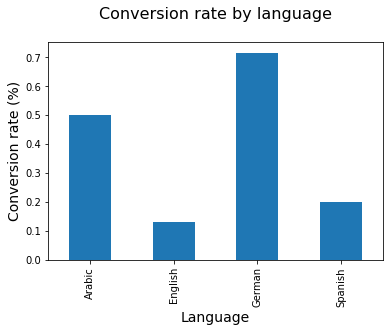

In [27]:
import matplotlib.pyplot as plt

# Create a bar chart using language_conversion_rate DataFrame
language_conversion_rate.plot(kind = 'bar')

# Add a title and x and y-axis labels
plt.title('Conversion rate by language\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Language', size = 14)

# Display the plot
plt.show()

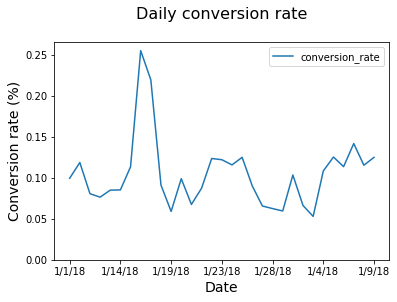

In [30]:
#
# Group by date_served and count unique users
total = marketing.groupby(['date_served'])['user_id']\
                     .nunique()

# Group by date_served and calculate subscribers
subscribers = marketing[marketing['converted'] == True]\
                         .groupby(['date_served'])\
                         ['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rate = subscribers/total

# Reset index to turn the results into a DataFrame
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index(0))

# Rename columns
daily_conversion_rate.columns = ['date_served', 
                                 'conversion_rate']

# Create a line chart using daily_conversion_rate DataFrame
daily_conversion_rate.plot('date_served', 
                           'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

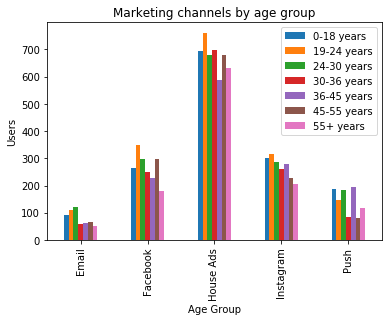

In [31]:
channel_age = marketing.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot the results
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
           labels = channel_age_df.columns.values)
plt.show()

In [37]:
#
# Count the subs by subscribing channel and date subscribed
retention_total = marketing.groupby(['date_subscribed',
                                     'subscribing_channel'])\
                                       ['user_id'].nunique()

# Count the retained subs by subscribing channel and date subscribed
retention_subs = marketing[marketing['is_retained'] == True]\
                           .groupby(['date_subscribed',
                                     'subscribing_channel'])\
                            ['user_id'].nunique()

# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

retention_rate_df.head(10)

subscribing_channel,Email,Facebook,House Ads,Instagram,Push
date_subscribed,,,,,
1/1/18,1.000000,0.875000,0.687500,0.750000,1.000000
1/10/18,1.000000,0.714286,0.666667,0.555556,1.000000
1/11/18,0.333333,0.571429,0.166667,1.000000,1.000000
1/12/18,NaN,0.571429,NaN,0.500000,0.333333
1/13/18,0.333333,0.666667,0.166667,0.666667,0.500000
1/14/18,1.000000,0.666667,0.166667,0.909091,NaN
1/15/18,0.804348,0.375000,0.166667,0.875000,1.000000
1/16/18,0.943396,0.588235,0.166667,0.294118,0.636364
1/17/18,0.432432,0.642857,0.333333,0.894737,0.900000


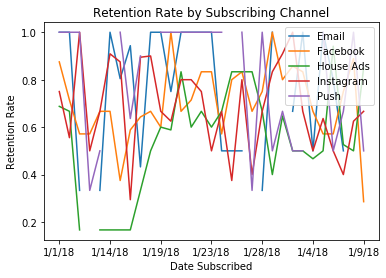

In [39]:
#
# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate')
plt.legend(loc = 'upper right', 
           labels = retention_rate_df.columns.values)
plt.show()

- - -

**このシリーズの別のポストを見るには**

　　　[[<<Prev]](https://jaysung00.github.io/jays_blog/datacamp/2021/02/02/Marketing-1.html)　　[[Next >>]](https://jaysung00.github.io/jays_blog/datacamp/2021/02/03/Marketing-3.html)